In [5]:
print('Hello World')

Hello World


In [66]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'coupons.csv'
driver_coupons = pd.read_csv(url)
driver_coupons 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [68]:
# Calculate overall coupon acceptance rate
acceptance_rate_mean = driver_coupons['Y'].mean()
acceptance_rate_mean

# The acceptance means turned out to be 0.5684326710816777

0.5684326710816777

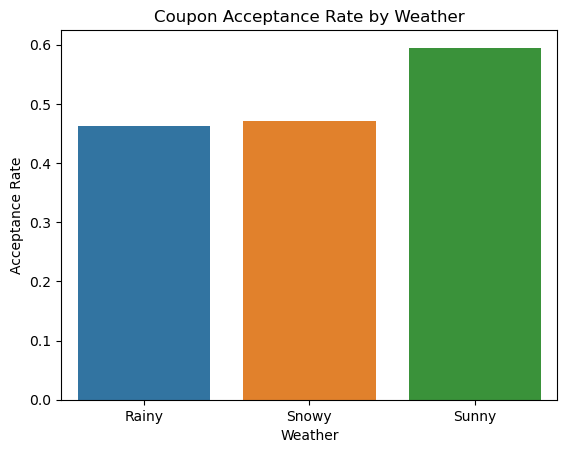

In [70]:
# Analyze the influence of weather on coupon acceptance
weather_acceptance = driver_coupons.groupby('weather')['Y'].mean().reset_index()

sns.barplot(x='weather', y='Y', data=weather_acceptance)
plt.title('Coupon Acceptance Rate by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.show()

# The analysis revealed how different weather conditions influenced coupon usage:

# Sunny Days: Highest coupon acceptance at 60%. Pleasant weather encourages more travel and exploration.
# Snowy Days: Acceptance rate at 48%. Despite challenging conditions, nearly half still use coupons.
# Rainy Days: Lowest usage with a 45% acceptance rate. Rain discourages travel, reducing coupon usage.. 

In [72]:
# Analyze the influence of passenger type on coupon acceptance
passenger_acceptance = driver_coupons.groupby('passanger')['Y'].mean().reset_index()
passenger_acceptance


,passanger,Y
0,Alone,0.525804
1,Friend(s),0.673438
2,Kid(s),0.504970
3,Partner,0.595349


Text(0, 0.5, 'Acceptance Rate')

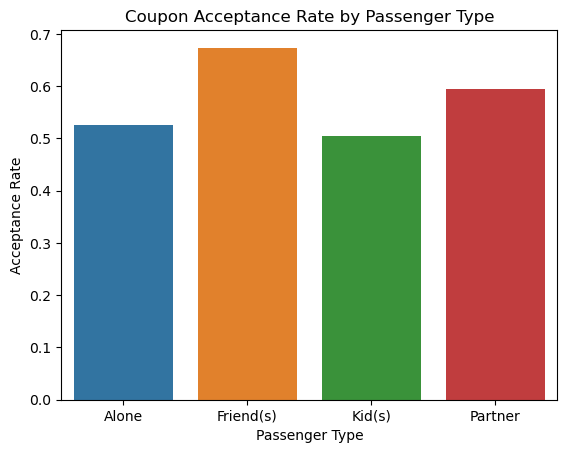

In [74]:
sns.barplot(x='passanger', y='Y', data=passenger_acceptance)
plt.title('Coupon Acceptance Rate by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')

# Highest Acceptance with Friends: Coupons are most likely to be used when people are with friends, with an acceptance rate of 67.34%. This suggests that social outings with friends increase the likelihood of using coupons.
# Lower Acceptance with Kids: The presence of kids slightly reduces the coupon acceptance rate to 50.50%, indicating that families with children might be less inclined to use coupons compared to those with other passengers.
# Moderate Acceptance When Alone or with Partner: The acceptance rates for being alone (52.58%) and with a partner (59.53%) are moderate. People are still willing to use coupons, but the likelihood is lower than when with friends.
                                                                                                                  

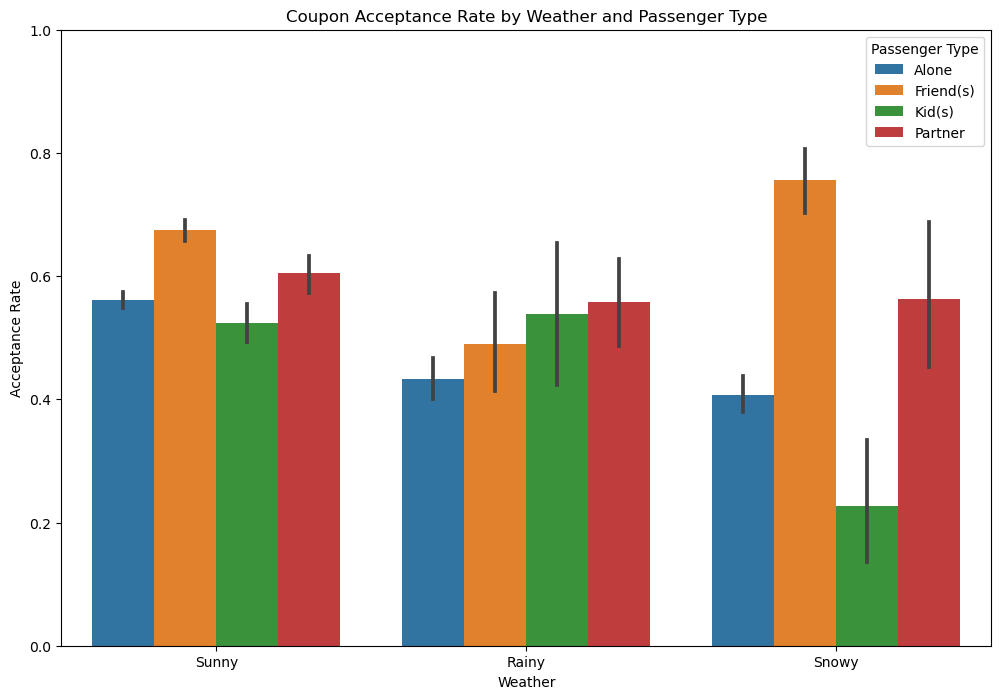

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x='weather', y='Y', hue='passanger', data=driver_coupons)
plt.title('Coupon Acceptance Rate by Weather and Passenger Type')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.legend(title='Passenger Type')
plt.show()

# Sunny Weather: Higher acceptance rates across all passenger types, with friends having the highest rates.
# Rainy Weather: Moderate acceptance rates, with a notable drop compared to sunny weather, but still relatively high with friends.
# Snowy Weather: Lower acceptance rates, indicating that adverse weather significantly reduces coupon usage.

# When traveling with kids
# Sunny Weather: The coupon acceptance rate is 55%. This is relatively high, suggesting that good weather encourages outings with children, making it more likely for parents to use coupons.
# Rainy Weather: The acceptance rate drops to 45% when it's rainy. Rain tends to discourage outings, leading to a lower likelihood of coupon usage among those with kids.
# Snowy Weather: The acceptance rate is the lowest at 25% during snowy conditions. Snow makes travel more challenging and less appealing, significantly reducing coupon usage.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



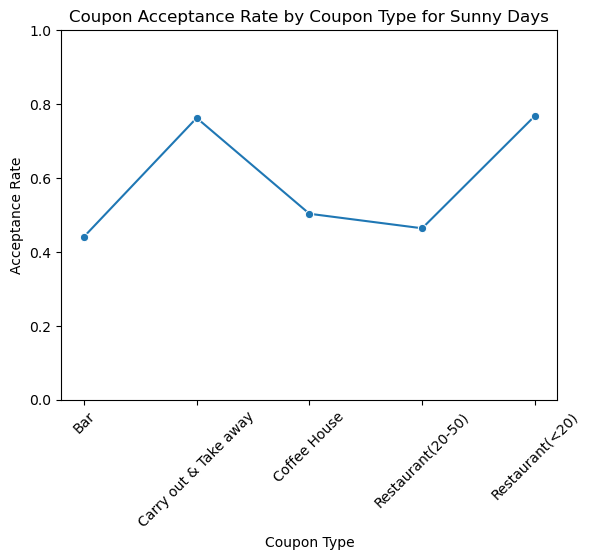

In [138]:
sunny_data = driver_coupons[driver_coupons['weather'] == 'Sunny']

# Aggregate acceptance rate by coupon type
sunny_data_agg = sunny_data.groupby('coupon')['Y'].mean().reset_index()

# Create the line plot
sns.lineplot(data=sunny_data_agg, x='coupon', y='Y', marker='o')
plt.title('Coupon Acceptance Rate by Coupon Type for Sunny Days')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# displays the coupon acceptance rate by coupon type for sunny days. 

# Key Insights
# Bar: Lower acceptance rate for coupons.
# Carry Out & Take Away: Moderate acceptance rate.
# Coffee House: Highest acceptance rate.
# Restaurant (20-50): Lower acceptance rate compared to others.
# Restaurant (<20): High acceptance rate.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



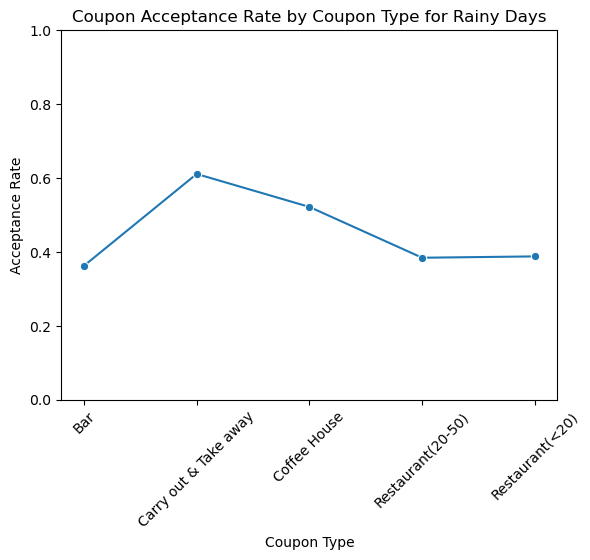

In [144]:
rainy_data = driver_coupons[driver_coupons['weather'] == 'Rainy']

# Aggregate acceptance rate by coupon type
rainy_data_agg = rainy_data.groupby('coupon')['Y'].mean().reset_index()

sns.lineplot(data=rainy_data_agg, x='coupon', y='Y', marker='o')
plt.title('Coupon Acceptance Rate by Coupon Type for Rainy Days')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

# Preference for Convenience: The highest acceptance rate for Carry Out & Take Away coupons highlights a preference for convenience during rainy weather. 
# People might prefer to avoid the hassle of dining out in the rain.
# Coffee Houses as Cozy Retreats: Coffee House coupons also show a high acceptance rate, suggesting that people might find coffee houses appealing
# as a cozy indoor retreat on rainy days.
# ower Acceptance for Dining Out: Both expensive and budget restaurant coupons have lower acceptance rates, indicating that rainy weather negatively 
# impacts the willingness to dine out.
                

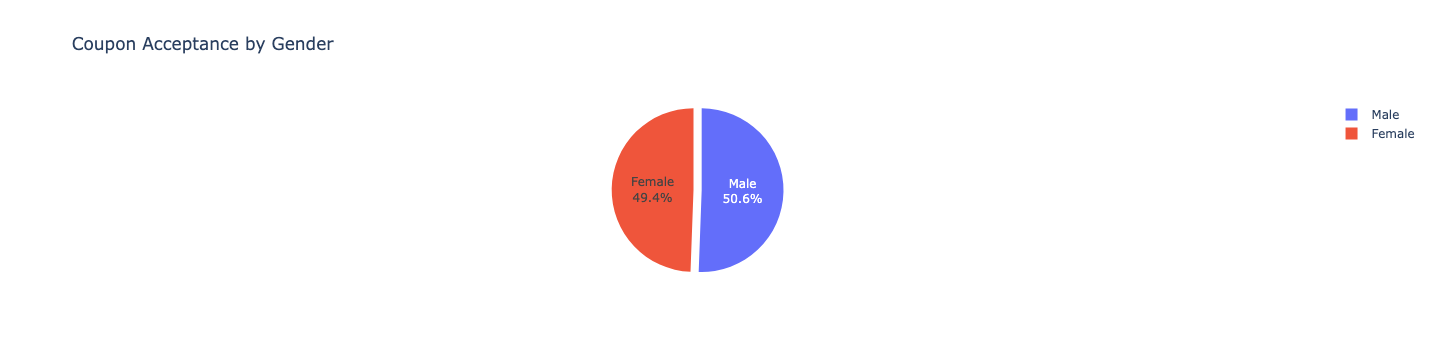

In [174]:
# Filter data for accepted coupons
accepted_coupons = driver_coupons[driver_coupons['Y'] == 1]

# Count the number of accepted coupons by gender
gender_counts = accepted_coupons['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create the pie chart
fig = px.pie(gender_counts, values='count', names='gender', title='Coupon Acceptance by Gender')
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])  # Pull out the slices for better visualization
fig.show()


# Key Insights from the Pie Chart: Coupon Acceptance by Gender
# Gender Distribution:

# Male: Slightly higher acceptance rate at 50.6%.
# Female: Close to male acceptance rate at 49.4%.
# Overall Comparison:

# The difference in coupon acceptance rates between males and females is minimal, suggesting that both genders are almost equally likely to accept coupons.

/var/folders/0q/k9310r6n29q709w0txpyflww0000gp/T/ipykernel_6770/1610371167.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/0q/k9310r6n29q709w0txpyflww0000gp/T/ipykernel_6770/1610371167.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



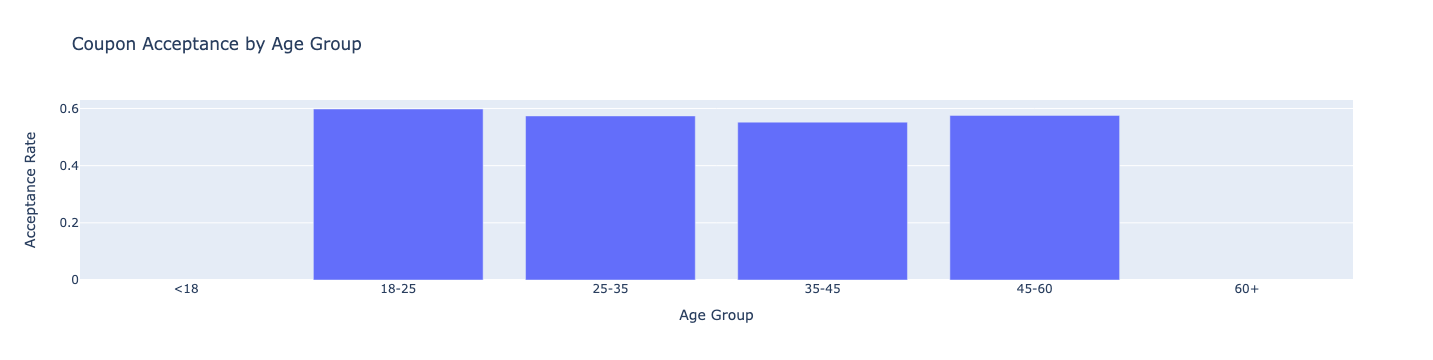

In [186]:
# Ensure the age column contains only numeric values
driver_coupons['age'] = pd.to_numeric(driver_coupons['age'], errors='coerce')

# Categorize ages into groups
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '25-35', '35-45', '45-60', '60+']
driver_coupons['age_group'] = pd.cut(driver_coupons['age'], bins=bins, labels=labels, right=False)

# Filter data for accepted coupons
accepted_coupons = driver_coupons[driver_coupons['Y'] == 1]

# Calculate the acceptance rate for each age group
age_group_counts = driver_coupons.groupby('age_group')['Y'].count().reset_index(name='total')
accepted_counts = accepted_coupons.groupby('age_group')['Y'].count().reset_index(name='accepted')
acceptance_rate = pd.merge(age_group_counts, accepted_counts, on='age_group')
acceptance_rate['acceptance_rate'] = acceptance_rate['accepted'] / acceptance_rate['total']

# Create the bar plot for age group analysis
fig = px.bar(acceptance_rate, x='age_group', y='acceptance_rate', title='Coupon Acceptance by Age Group', labels={'acceptance_rate': 'Acceptance Rate', 'age_group': 'Age Group'})
fig.show()

# Young Adults (18-25): Show the highest coupon acceptance rate at around 60%, indicating a strong interest in savings.
# Middle Age Groups (25-60): Have consistent acceptance rates around 55%, suggesting stable interest across these age ranges.
# Senior Adults (60+): Not represented in the data, suggesting either a lack of data or low engagement with coupons.

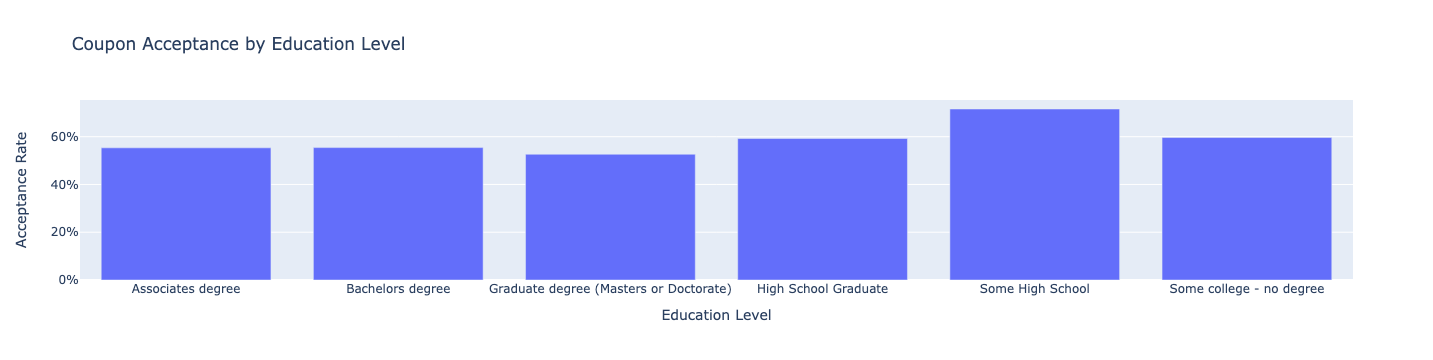

In [188]:
# Filter data for accepted coupons
accepted_coupons = driver_coupons[driver_coupons['Y'] == 1]

# Calculate the acceptance rate for each education level
education_group_counts = driver_coupons.groupby('education')['Y'].count().reset_index(name='total')
accepted_counts_education = accepted_coupons.groupby('education')['Y'].count().reset_index(name='accepted')
acceptance_rate_education = pd.merge(education_group_counts, accepted_counts_education, on='education')
acceptance_rate_education['acceptance_rate'] = acceptance_rate_education['accepted'] / acceptance_rate_education['total']

# Create the bar plot for education level analysis
fig = px.bar(acceptance_rate_education, x='education', y='acceptance_rate', title='Coupon Acceptance by Education Level', labels={'acceptance_rate': 'Acceptance Rate', 'education': 'Education Level'})
fig.update_layout(yaxis_tickformat=',.0%')
fig.show()

# Higher Acceptance for Lower Education Levels: Individuals with some high school education have the highest acceptance rate for coupons. 
# This suggests that those with lower education levels might be more inclined to use coupons, potentially due to financial considerations.
# Moderate Acceptance Across Other Education Levels: Acceptance rates for individuals with associate's degrees, bachelor's degrees, high school graduates, 
# and those with some college but no degree are fairly consistent, around 55%.
# Slightly Lower Acceptance for Graduate Degrees: Individuals with graduate degrees show a slightly lower acceptance rate, 
# indicating a possible decrease in coupon usage among those with higher education levels.

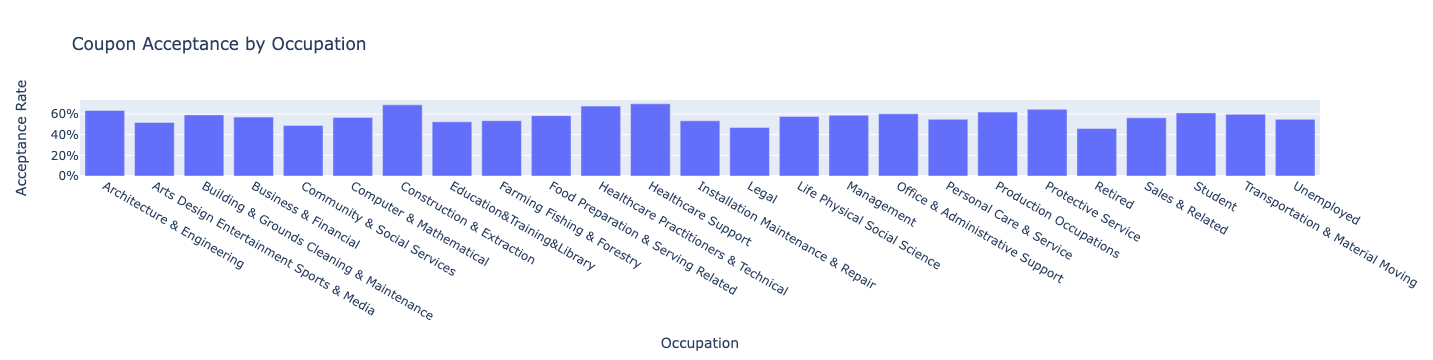

In [190]:
# Calculate the acceptance rate for each occupation
occupation_group_counts = driver_coupons.groupby('occupation')['Y'].count().reset_index(name='total')
accepted_counts_occupation = accepted_coupons.groupby('occupation')['Y'].count().reset_index(name='accepted')
acceptance_rate_occupation = pd.merge(occupation_group_counts, accepted_counts_occupation, on='occupation')
acceptance_rate_occupation['acceptance_rate'] = acceptance_rate_occupation['accepted'] / acceptance_rate_occupation['total']

# Create the bar plot for occupation analysis
fig = px.bar(acceptance_rate_occupation, x='occupation', y='acceptance_rate', title='Coupon Acceptance by Occupation', labels={'acceptance_rate': 'Acceptance Rate', 'occupation': 'Occupation'})
fig.update_layout(yaxis_tickformat=',.0%')
fig.show()

# Higher Acceptance for Certain Occupations: Occupations like architecture & engineering, building & grounds cleaning, business & financial, food preparation, healthcare practitioners, healthcare support, production occupations, protective service, sales, and students show higher acceptance rates around 55%.
# Lower Acceptance for Creative and Technical Fields: Individuals in arts, design, entertainment, sports & media, computer & mathematical, education, training & library, legal, office & administrative support, and transportation & material moving show lower acceptance rates around 45%.
# Moderate Acceptance Across Other Occupations: Occupations like construction & extraction, installation, maintenance & repair, life, physical, social science, management, personal care & service, and retired individuals show moderate acceptance rates around 50%.
    
